In [63]:
import pandas as pd
import sqlite3
from datetime import datetime
import os
import sys
from collections import OrderedDict
import numpy as np

In [122]:
MET_res = "/media/cap/extra_work/CERISE/MET_CARRA1_vs_IMS_winter_2015"
#MET_res = "/media/cap/extra_work/CERISE/MET_CERISE_vs_IMS_winter_2015"


#MET_res = "/media/cap/extra_work/CERISE/MET_CERISE_vs_IMS_winter_2015"
#MET_res = "/media/cap/extra_work/CERISE/MET_ERALAND_vs_IMS_winter_2015"

all_results = os.listdir(MET_res)
results = OrderedDict()
for f in all_results:
    
    if f.endswith("_cts.txt"):
        read_date = f.split("_")[3]
        results[read_date]  = pd.read_csv(os.path.join(MET_res,f),sep=r'\s+')
    elif f.endswith(".nc"):
        ncfile = f
    

In [123]:
len(results.keys())


213

#### PODY: is the probabily of detection. It  is the hit rate (HR)
####  POFS is the probabiliy of false detection. It is the false alarm rate (FAR)
#### ACC is the  accuracy

In [124]:
#PODY: is the probabily of detection. IT is the false alarm rate
# 
check_date="20151101"
pod_cols = [col for col in results[check_date].columns if "POD" in col]
pof_cols = [col for col in results[check_date].columns if "POF" in col]
#acc_cols = [col for col in results["20160510"].columns if "ACC" in col]
fss_cols = [col for col in results[check_date].columns if "FSS" in col]
acc_cols = [col for col in results[check_date].columns if "ANOM_CORR" in col]

In [125]:
results[check_date][['FCST_LEAD', 'FCST_VALID_BEG',
       'FCST_VALID_END', 'OBS_LEAD', 'OBS_VALID_BEG', 'OBS_VALID_END',"PODY","VX_MASK"]]

,FCST_LEAD,FCST_VALID_BEG,FCST_VALID_END,OBS_LEAD,OBS_VALID_BEG,OBS_VALID_END,PODY,VX_MASK
0,0,20151101_060000,20151101_060000,0,20151101_060000,20151101_060000,0.63436,FULL
1,0,20151101_060000,20151101_060000,0,20151101_060000,20151101_060000,0.49913,NORTH_SWEDEN


In [126]:
results[check_date]["VX_MASK"]

0            FULL
1    NORTH_SWEDEN
Name: VX_MASK, dtype: object

### Collect the values for all dates and take the PODY


In [127]:
REGION = "FULL"

hit_dict=OrderedDict()

for label in ["datetime","hit_rate"]:
    hit_dict[label] = []
for key_date in results.keys():
    df_sel = results[key_date][results[key_date]["VX_MASK"]  == REGION]
    hit_dict["hit_rate"].append(df_sel["PODY"].values[0])
    hit_dict["datetime"].append(datetime.strptime(df_sel["FCST_VALID_BEG"].values[0],"%Y%m%d_%H%M%S"))

### find fraction skill score

In [128]:
fss_files=OrderedDict()
for f in all_results:
    
    if f.endswith("_nbrcnt.txt"):
        read_date = f.split("_")[3]
        fss_files[read_date]  = pd.read_csv(os.path.join(MET_res,f),sep=r'\s+')
    
    

In [129]:
fss_files.keys()

odict_keys(['20160202', '20160118', '20160408', '20160510', '20160425', '20160316', '20160420', '20160426', '20160407', '20160121', '20160101', '20151217', '20151101', '20160322', '20160216', '20160524', '20160519', '20160528', '20151127', '20151207', '20160511', '20160308', '20160103', '20160312', '20151202', '20151225', '20160427', '20160130', '20151108', '20151220', '20160429', '20160303', '20160520', '20160207', '20160105', '20160209', '20151211', '20160403', '20160421', '20160521', '20160329', '20151117', '20160412', '20160131', '20151113', '20160107', '20160318', '20160317', '20160321', '20160307', '20160210', '20160530', '20160415', '20160424', '20160228', '20160218', '20160310', '20160224', '20160410', '20160215', '20160214', '20151115', '20160102', '20160125', '20160517', '20160414', '20160416', '20160522', '20160213', '20160422', '20160106', '20160204', '20160217', '20160525', '20160325', '20151205', '20160211', '20160212', '20160418', '20160509', '20160428', '20160502', '201

In [130]:
# other columns
fss_files[check_date].columns

Index(['VERSION', 'MODEL', 'DESC', 'FCST_LEAD', 'FCST_VALID_BEG',
       'FCST_VALID_END', 'OBS_LEAD', 'OBS_VALID_BEG', 'OBS_VALID_END',
       'FCST_VAR', 'FCST_UNITS', 'FCST_LEV', 'OBS_VAR', 'OBS_UNITS', 'OBS_LEV',
       'OBTYPE', 'VX_MASK', 'INTERP_MTHD', 'INTERP_PNTS', 'FCST_THRESH',
       'OBS_THRESH', 'COV_THRESH', 'ALPHA', 'LINE_TYPE', 'TOTAL', 'FBS',
       'FBS_BCL', 'FBS_BCU', 'FSS', 'FSS_BCL', 'FSS_BCU', 'AFSS', 'AFSS_BCL',
       'AFSS_BCU', 'UFSS', 'UFSS_BCL', 'UFSS_BCU', 'F_RATE', 'F_RATE_BCL',
       'F_RATE_BCU', 'O_RATE', 'O_RATE_BCL', 'O_RATE_BCU'],
      dtype='object')

In [131]:
fss_files[check_date][["VX_MASK","INTERP_PNTS","FSS","FCST_LEAD","FCST_VALID_BEG","FCST_VALID_END"]]

,VX_MASK,INTERP_PNTS,FSS,FCST_LEAD,FCST_VALID_BEG,FCST_VALID_END
0,FULL,1,0.73756,0,20151101_060000,20151101_060000
1,NORTH,1,0.75469,0,20151101_060000,20151101_060000
2,FULL,9,0.78316,0,20151101_060000,20151101_060000
3,NORTH,9,0.86857,0,20151101_060000,20151101_060000
4,FULL,25,0.79871,0,20151101_060000,20151101_060000
5,NORTH,25,0.89361,0,20151101_060000,20151101_060000
6,FULL,49,0.80866,0,20151101_060000,20151101_060000
7,NORTH,49,0.90256,0,20151101_060000,20151101_060000


In [132]:
fss_cols = [col for col in fss_files[check_date].columns if "FSS" in col]
fss_cols

['FSS',
 'FSS_BCL',
 'FSS_BCU',
 'AFSS',
 'AFSS_BCL',
 'AFSS_BCU',
 'UFSS',
 'UFSS_BCL',
 'UFSS_BCU']

In [133]:
fss_files[check_date][["FSS"]]

,FSS
0,0.73756
1,0.75469
2,0.78316
3,0.86857
4,0.79871
5,0.89361
6,0.80866
7,0.90256


### Plot the FSS for a given domain

In [134]:
date_sel = check_date
get_fss_all = fss_files[date_sel][fss_files[date_sel]["VX_MASK"] == "FULL"]
get_fss_nor_scan = fss_files[date_sel][fss_files[date_sel]["VX_MASK"] == "NORTH_SWEDEN"]

fss_all = get_fss_all[["INTERP_PNTS","FSS","FCST_LEAD","FCST_VALID_BEG","FCST_VALID_END"]]

In [135]:
fss_all

,INTERP_PNTS,FSS,FCST_LEAD,FCST_VALID_BEG,FCST_VALID_END
0,1,0.73756,0,20151101_060000,20151101_060000
2,9,0.78316,0,20151101_060000,20151101_060000
4,25,0.79871,0,20151101_060000,20151101_060000
6,49,0.80866,0,20151101_060000,20151101_060000


In [136]:
fss_nor_scan = get_fss_nor_scan[["INTERP_PNTS","FSS","FCST_LEAD","FCST_VALID_BEG","FCST_VALID_END"]]
fss_nor_scan

,INTERP_PNTS,FSS,FCST_LEAD,FCST_VALID_BEG,FCST_VALID_END


In [112]:
for _,r in fss_all.iterrows():
    print(r["FSS"])

0.75113
0.79936
0.8153
0.82597


In [118]:
df_fss_full = pd.DataFrame(columns=["date","points","fss"])
df_fss_nor_scan = pd.DataFrame(columns=["date","points","fss"])


In [119]:
for key in fss_files:
    data = fss_files[key][fss_files[key]["VX_MASK"] == "FULL"]
    for _,r in data.iterrows():
        conv_date = datetime.strptime(r["FCST_VALID_BEG"],"%Y%m%d_%H%M%S")
        data_row = pd.DataFrame({"date":[conv_date],"points":[r["INTERP_PNTS"]],"fss":[r["FSS"]]},columns=["date","points","fss"])
        df_fss_full=pd.concat([df_fss_full,data_row],ignore_index=True)

for key in fss_files:
    data = fss_files[key][fss_files[key]["VX_MASK"] == "NORTH_SWEDEN"]
    for _,r in data.iterrows():
        conv_date = datetime.strptime(r["FCST_VALID_BEG"],"%Y%m%d_%H%M%S")
        data_row = pd.DataFrame({"date":[conv_date],"points":[r["INTERP_PNTS"]],"fss":[r["FSS"]]},columns=["date","points","fss"])
        df_fss_nor_scan=pd.concat([df_fss_nor_scan,data_row],ignore_index=True)

/tmp/ipykernel_167792/3163651814.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_fss_full=pd.concat([df_fss_full,data_row],ignore_index=True)


In [137]:
df_fss_full

,date,points,fss
0,2016-02-02 06:00:00,1,0.92417
1,2016-02-02 06:00:00,9,0.95653
2,2016-02-02 06:00:00,25,0.96793
3,2016-02-02 06:00:00,49,0.97500
4,2016-01-18 06:00:00,1,0.91776
...,...,...,...
843,2016-01-28 06:00:00,49,0.97568
844,2015-11-14 06:00:00,1,0.87478
845,2015-11-14 06:00:00,9,0.91237
846,2015-11-14 06:00:00,25,0.92583


In [138]:
df_fss_nor_scan

,date,points,fss


In [116]:
df_fss_full["day"] = df_fss_full["date"].dt.strftime('%Y-%m-%d')
df_fss_nor_scan["day"] = df_fss_nor_scan["date"].dt.strftime('%Y-%m-%d')

#df_fss_full["day"] = df_fss_full["date"].dt.strftime('%Y-%m-%d')


AttributeError: Can only use .dt accessor with datetimelike values

In [96]:
df_fss_full

,date,points,fss,day
0,2016-02-02 06:00:00,1,0.080555,2016-02-02
1,2016-02-02 06:00:00,9,0.083772,2016-02-02
2,2016-02-02 06:00:00,25,0.084130,2016-02-02
3,2016-02-02 06:00:00,49,0.083661,2016-02-02
4,2016-01-18 06:00:00,1,0.081137,2016-01-18
...,...,...,...,...
847,2016-04-02 06:00:00,49,0.084553,2016-04-02
848,2015-11-14 06:00:00,1,0.090297,2015-11-14
849,2015-11-14 06:00:00,9,0.094374,2015-11-14
850,2015-11-14 06:00:00,25,0.094777,2015-11-14


In [39]:
df_fss_nor_scan

,date,points,fss,day
0,2016-02-02 06:00:00,1,0.0,2016-02-02
1,2016-02-02 06:00:00,9,0.0,2016-02-02
2,2016-02-02 06:00:00,25,0.0,2016-02-02
3,2016-02-02 06:00:00,49,0.0,2016-02-02
4,2016-01-18 06:00:00,1,0.0,2016-01-18
...,...,...,...,...
847,2016-04-02 06:00:00,49,0.0,2016-04-02
848,2015-11-14 06:00:00,1,0.0,2015-11-14
849,2015-11-14 06:00:00,9,0.0,2015-11-14
850,2015-11-14 06:00:00,25,0.0,2015-11-14


In [37]:
#df_fss_nor_scan["day"] = df_fss_nor_scan["date"].dt.strftime('%Y-%m-%d')
select = df_fss_full[(df_fss_full.date >= datetime(2015,11,1)) & (df_fss_full.date <= datetime(2015,11,15))]
#select = df_fss_full[(df_fss_full.date >= datetime(2016,5,1)) & (df_fss_full.date <= datetime(2016,5,15))]
#select = df_fss_nor_scan[(df_fss_nor_scan.date >= datetime(2015,11,1)) & (df_fss_full.date <= datetime(2015,11,15))]
#select = df_fss_nor_scan[(df_fss_nor_scan.date >= datetime(2016,5,1)) & (df_fss_full.date <= datetime(2016,5,15))]

pivot_df = select.pivot(index='day', columns='points', values='fss')


ValueError: Index contains duplicate entries, cannot reshape

In [32]:
#pivot_df = df_fss_full.pivot(index='day', columns='points', values='fss')


In [33]:
from matplotlib.colors import LinearSegmentedColormap


# Create custom colormap (red to green)
colors = ['red', 'green']
n_bins = 10  # Number of color gradients
cmap = LinearSegmentedColormap.from_list("custom", colors, N=n_bins)

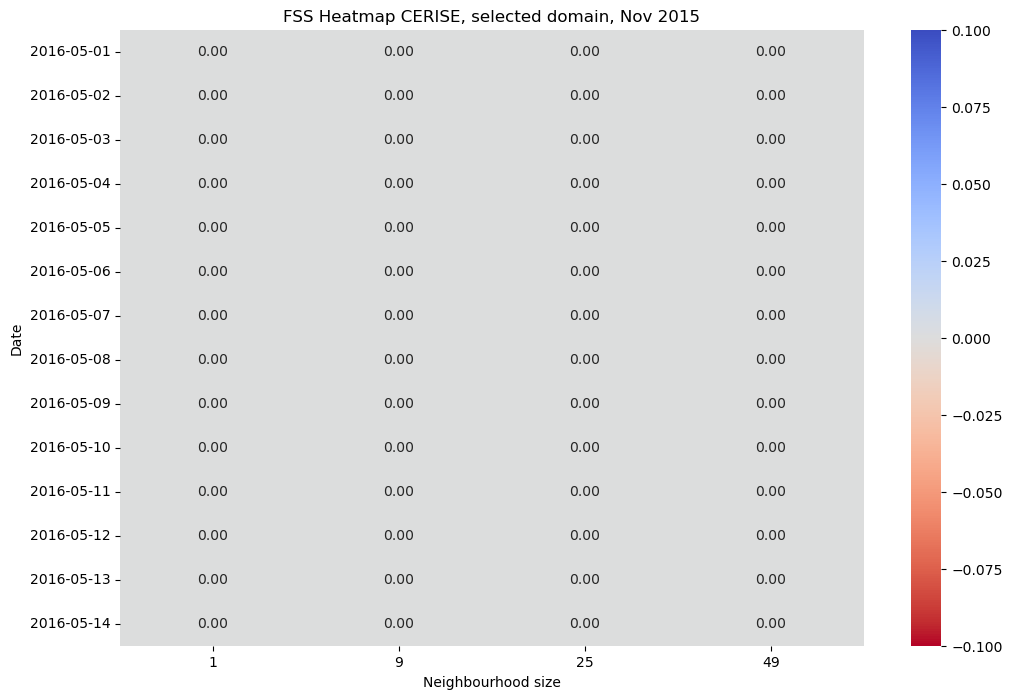

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, ListedColormap
#cmap = "viridis"
cmap = "coolwarm"
cmap = plt.cm.coolwarm.reversed()  # Inverted coolwarm
# Define the custom colormap (red to green)
#colors = ["#ff0000", "#ff8000", "#ffff00", "#80ff00", "#00ff00"]  # Red to green
#cmap = ListedColormap(colors)
#pivot_df = df_fss_full.pivot(index='day', columns='points', values='fss')

bounds = [0.5, 0.6,0.7, 0.8, 0.9,1.0]
norm = BoundaryNorm(bounds, ncolors=256)
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, annot=True, fmt=".2f", cmap=cmap) #,norm=norm)

plt.title(f'FSS Heatmap CERISE, selected domain, Nov 2015')
plt.xlabel('Neighbourhood size')
plt.ylabel('Date')

plt.show()

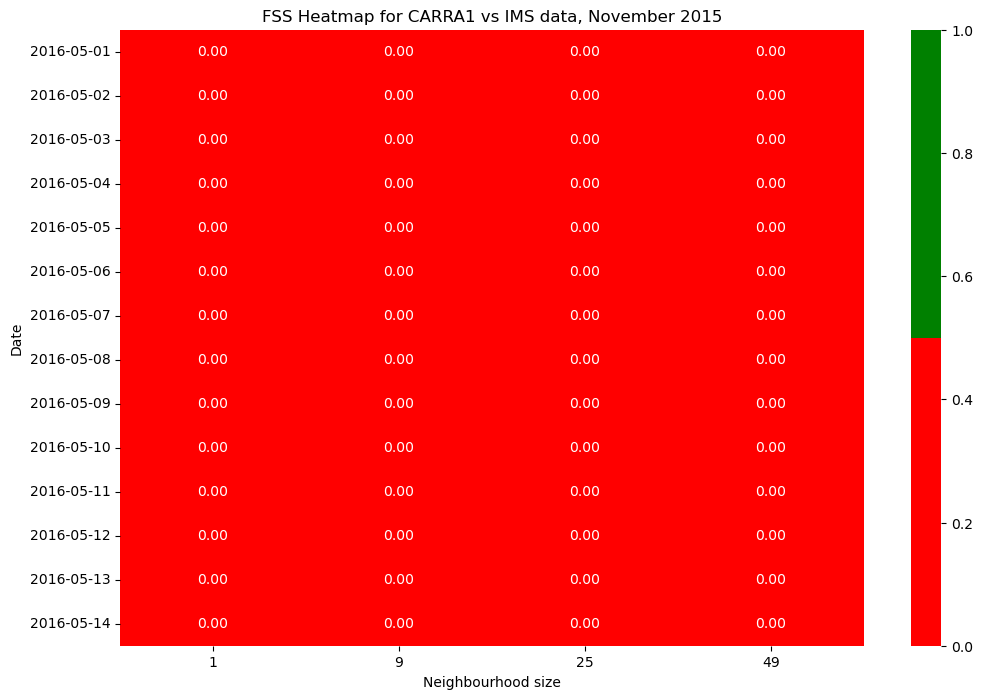

In [36]:
# make a reduced version

import matplotlib.colors as mcolors
# Create a custom colormap with red for values < 0.5 and green for values >= 0.5
colors = ['red', 'green']
n_bins = 2  # We only want two colors
custom_cmap = mcolors.LinearSegmentedColormap.from_list('custom', colors, N=n_bins)

# Create the heatmap
plt.figure(figsize=(12, 8))

# Create a mask for values >= 0.5
mask_high = pivot_df >= 0.9
mask_low = pivot_df < 0.9

# Plot the heatmap with custom colormap
sns.heatmap(pivot_df, annot=True, fmt=".2f", cmap=custom_cmap,
            vmin=0, vmax=1,  # Set the range of values
            center=0.5)      # Set the center point for color transition

plt.title('FSS Heatmap for CARRA1 vs IMS data, November 2015')
plt.xlabel('Neighbourhood size')
plt.ylabel('Date')
plt.savefig('fss_heatmap_carra1.png', dpi=300, bbox_inches='tight')
plt.show()


In [68]:
df_fss_nor_scan["day"] = df_fss_nor_scan["date"].dt.strftime('%Y-%m-%d')
select = df_fss_nor_scan[(df_fss_nor_scan.date >= datetime(2015,11,1)) & (df_fss_full.date < datetime(2015,11,15))]
#select = df_fss_nor_scan
pivot_df = select.pivot(index='day', columns='points', values='fss')


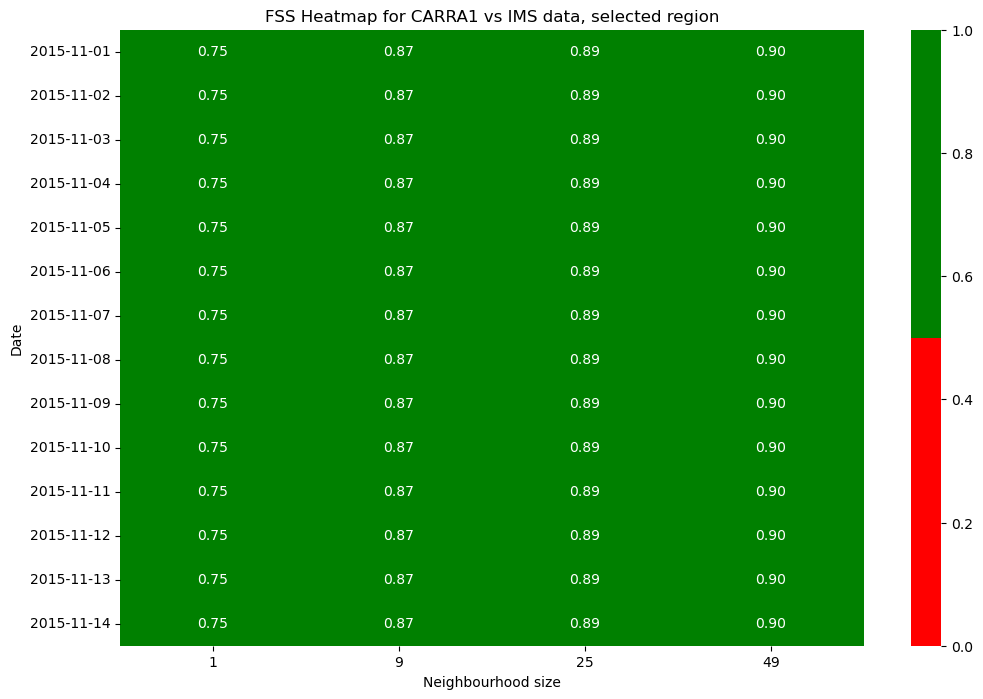

In [70]:
# make a reduced version

import matplotlib.colors as mcolors
# Create a custom colormap with red for values < 0.5 and green for values >= 0.5
colors = ['red', 'green']
n_bins = 2  # We only want two colors
custom_cmap = mcolors.LinearSegmentedColormap.from_list('custom', colors, N=n_bins)

# Create the heatmap
plt.figure(figsize=(12, 8))

# Create a mask for values >= 0.5
#mask_high = pivot_df >= 0.5
#mask_low = pivot_df < 0.5

# Plot the heatmap with custom colormap
sns.heatmap(pivot_df, annot=True, fmt=".2f", cmap=custom_cmap,
            vmin=0, vmax=1,  # Set the range of values
            center=0.5)      # Set the center point for color transition

plt.title('FSS Heatmap for CARRA1 vs IMS data, selected region')
plt.xlabel('Neighbourhood size')
plt.ylabel('Date')
plt.savefig('fss_heatmap_carra1.png', dpi=300, bbox_inches='tight')
plt.show()
